### Feature extraction

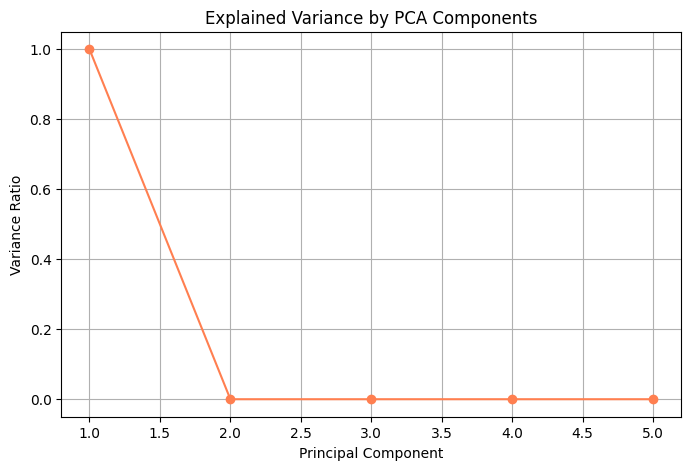

In [5]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load preprocessed data from previous stage
data = pd.read_csv("preprocessed_data.csv")

numeric_cols = ['Open', 'High', 'Low', 'Close', 'Volume']
X_pca = data[numeric_cols]

pca = PCA(n_components=len(numeric_cols))
X_pca_transformed = pca.fit_transform(X_pca)

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(numeric_cols)+1), pca.explained_variance_ratio_, marker='o', color='coral')
plt.title('Explained Variance by PCA Components')
plt.xlabel('Principal Component')
plt.ylabel('Variance Ratio')
plt.grid(True)
plt.show()

# Save feature engineered data for next stage
data.to_csv('feature_engineered_data.csv', index=False)



In [6]:
X_pca = data[numeric_cols]

pca = PCA(n_components=2)
X_pca_2d = pca.fit_transform(X_pca)

pca_2d_df = pd.DataFrame(X_pca_2d, columns=['PC1', 'PC2'])
pca_2d_df['Date'] = data['Date'].values

print(pca_2d_df.head())

            PC1         PC2        Date
0  4.486591e+07 -114.471251  2020-01-02
1  5.570831e+07 -103.681698  2020-01-03
2  2.777271e+07 -132.354053  2020-01-06
3  1.825751e+07 -140.661373  2020-01-07
4  4.146471e+07 -116.723890  2020-01-08


## Feature selection

In [ ]:
from sklearn.feature_selection import mutual_info_classif

# 1 if next day Close > current Close, else 0
data['Target'] = (data['Close'].shift(-1) >

stock_data.dropna(inplace=True)

X_ig = stock_data[numeric_cols]
y_ig = stock_data['Target']
mi_scores = mutual_info_classif(X_ig, y_ig)

ig_df = pd.DataFrame({
    'Feature': numeric_cols,
    'Mutual Information': mi_scores
}).sort_values(by='Mutual Information', ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(data=ig_df, x='Mutual Information', y='Feature', palette='viridis')
plt.title('Information Gain (Mutual Information) of Features')
plt.show()

In [ ]:
selected_features = ['High', 'Volume']
X_ig_top3 = data[selected_features].copy()

X_ig_top3['Date'] = data['Date'].values

print(X_ig_top3.head())

# Save selected features for next stage
X_ig_top3.to_csv('selected_features_data.csv', index=False)


## Moving Average

In [ ]:
ma_df = data.copy()
ma_df['MA_7'] = ma_df['Close'].rolling(window=7).mean()
ma_df['MA_30'] = ma_df['Close'].rolling(window=30).mean()

plt.figure(figsize=(14, 7))
plt.style.use('dark_background')

plt.plot(ma_df.index, ma_df['Close'], label='Close Price (AAPL)', color='dodgerblue', alpha=0.7)

plt.plot(ma_df.index, ma_df['MA_7'], label='7-Day MA', color='orange', linestyle='--')
plt.plot(ma_df.index, ma_df['MA_30'], label='30-Day MA', color='brown', linestyle='-')

plt.title(" The Impact of Moving Average on AAPL Price (2020–2024)", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Price ($)", fontsize=12)


cross_up = ma_df[ma_df['MA_7'] > ma_df['MA_30']].index
cross_down = ma_df[ma_df['MA_7'] < ma_df['MA_30']].index

plt.fill_between(cross_up, ma_df.loc[cross_up, 'MA_7'], ma_df.loc[cross_up, 'MA_30'],
                 color='limegreen', alpha=0.3, label='Golden Cross')
plt.fill_between(cross_down, ma_df.loc[cross_down, 'MA_7'], ma_df.loc[cross_down, 'MA_30'],
                 color='crimson', alpha=0.3, label='Death Cross')

plt.legend(fontsize=12)
plt.tight_layout()
plt.show()
